In [1]:
from load_dataset import load_HELOC_dataset
from model_manager import PytorchModelManager
from cf_engine.engine import CFEnginePytorch
from cf_engine.counterfactual import CounterfactualExampleBySubset

In [2]:
import numpy as mp
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [3]:
dataset = load_HELOC_dataset()
mm = PytorchModelManager(dataset)
dm = mm.get_dir_manager()
try:
    mm.load_model()
except FileNotFoundError:
    mm.train()
    mm.save_model()
engine = CFEnginePytorch(mm, dataset)

/Users/chengfurui/Projects/counterfactuals/cf_ml/dataset.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[col] = (data_df[col] - minx)/(maxx-minx)


In [4]:
filters = [(f, 0, 1e4, False) for f in dataset.get_feature_names(preprocess=False)]
setting = {'index': 'test', 'changeable_attribute': 'all', 
           'filters': filters, 'cf_num': 1, 'desired_class': 'opposite', 'weight': 'mads'}
subset_cf = engine.generate_cfs_from_setting(setting, use_cache=False, batch_size=8, proximity_weight=0.1, \
                                             loss_diff=1e-6, cache=False)

# prediction results
valid_origin = subset_cf.get_instance()
valid_cf = subset_cf.get_cf()
# data information
feature = dataset.get_feature_names(preprocess=False)
des = dataset.get_description()

# difference between cfs and original instances
diff = valid_cf.reset_index(drop=True)[feature] - \
    valid_origin.reset_index(drop=True)[feature]
diff.index = valid_origin.index
normed_diff = diff.copy()
for f in feature:
    normed_diff[f] = diff[f] / (des[f]['max'] - des[f]['min'])

/Users/chengfurui/Projects/counterfactuals/env/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/chengfurui/Projects/counterfactuals/env/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/chengfurui/Projects/counterfactuals/env/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[8/522]  Epoch-0, time cost: 0.314s, loss: 12.743, iteration: 133, validation rate: 0.875
[16/522]  Epoch-1, time cost: 0.474s, loss: 8.741, iteration: 368, validation rate: 1.000
[24/522]  Epoch-2, time cost: 1.560s, loss: 16.081, iteration: 1355, validation rate: 1.000
[32/522]  Epoch-3, time cost: 0.288s, loss: 18.001, iteration: 141, validation rate: 0.625
[40/522]  Epoch-4, time cost: 0.474s, loss: 11.419, iteration: 311, validation rate: 1.000
[48/522]  Epoch-5, time cost: 0.480s, loss: 16.132, iteration: 286, validation rate: 1.000
[56/522]  Epoch-6, time cost: 1.097s, loss: 13.661, iteration: 881, validation rate: 1.000
[64/522]  Epoch-7, time cost: 0.499s, loss: 15.608, iteration: 358, validation rate: 1.000
[72/522]  Epoch-8, time cost: 0.334s, loss: 11.571, iteration: 205, validation rate: 1.000
[80/522]  Epoch-9, time cost: 0.315s, loss: 11.363, iteration: 157, validation rate: 1.000
[88/522]  Epoch-10, time cost: 0.372s, loss: 11.949, iteration: 246, validation rate: 1.000

In [5]:
(normed_diff.sum() + normed_diff.abs().sum())/2

ExternalRiskEstimate                  10.765942
MSinceOldestTradeOpen                  4.676216
MSinceMostRecentTradeOpen              1.973893
AverageMInFile                        25.227156
NumSatisfactoryTrades                 13.443021
NumTrades60Ever2DerogPubRec            7.105237
NumTrades90Ever2DerogPubRec            1.157895
PercentTradesNeverDelq                 5.980008
MSinceMostRecentDelq                   3.927718
MaxDelq2PublicRecLast12M               4.777780
MaxDelqEver                            0.000000
NumTotalTrades                         1.451924
NumTradesOpeninLast12M                 0.052632
PercentInstallTrades                   1.180010
MSinceMostRecentInqexcl7days           5.416664
NumInqLast6M                           7.681856
NumInqLast6Mexcl7days                  3.409097
NetFractionRevolvingBurden             5.793106
NetFractionInstallBurden               1.008494
NumRevolvingTradesWBalance             2.625000
NumInstallTradesWBalance               4

In [6]:
(normed_diff.sum() - normed_diff.abs().sum())/2

ExternalRiskEstimate                  -2.053177
MSinceOldestTradeOpen                 -0.950188
MSinceMostRecentTradeOpen             -4.274153
AverageMInFile                        -4.723238
NumSatisfactoryTrades                 -2.632897
NumTrades60Ever2DerogPubRec          -19.999956
NumTrades90Ever2DerogPubRec           -0.157895
PercentTradesNeverDelq                -1.300009
MSinceMostRecentDelq                  -1.060245
MaxDelq2PublicRecLast12M               0.000000
MaxDelqEver                            0.000000
NumTotalTrades                        -0.500001
NumTradesOpeninLast12M                -0.368421
PercentInstallTrades                  -6.990014
MSinceMostRecentInqexcl7days          -0.499999
NumInqLast6M                         -13.666700
NumInqLast6Mexcl7days                 -6.030307
NetFractionRevolvingBurden           -26.568947
NetFractionInstallBurden              -4.734608
NumRevolvingTradesWBalance           -13.187500
NumInstallTradesWBalance              -0

In [7]:
normed_diff.abs().sum(axis=1).mean()

0.4394309

In [8]:
# from sklearn.linear_model import LinearRegression

# dis = np.array(normed_diff.abs().sum(axis=1).to_list())
# scores = np.array((valid_origin['Score']-0.5).abs().to_list())

# l = LinearRegression().fit(dis[:, np.newaxis], scores)
# l.coef_
# l.score(dis[:, np.newaxis], scores)
# plt.scatter(dis, scores)
# plt.show()

In [9]:
"margin of good: {:.3f} margin of bad: {:.3f}".format(normed_diff[valid_origin['RiskPerformance'] == 'Good'].abs().sum(axis=1).mean(), \
          normed_diff[valid_origin['RiskPerformance'] == 'Bad'].abs().sum(axis=1).mean())

'margin of good: 0.287 margin of bad: 0.505'

In [13]:
good_index = valid_origin[valid_origin['RiskPerformance'] == 'Good'].index
bad_index = valid_origin[valid_origin['RiskPerformance'] == 'Bad'].index
good_origin = valid_origin.loc[good_index, :]
bad_fc = valid_cf[valid_cf['OriginIndex'].isin(good_index)]

key_features = normed_diff.columns[normed_diff.abs().sum().argsort()[-5:][::-1]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1381445f8>,
      dtype=object)

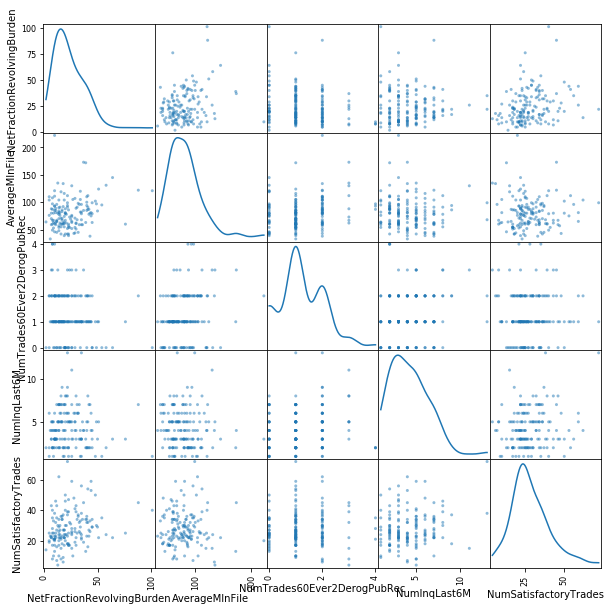

In [14]:
scatter_matrix(bad_fc[key_features], alpha=0.5, figsize=(10, 10), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13bbc99e8>,
      dtype=object)

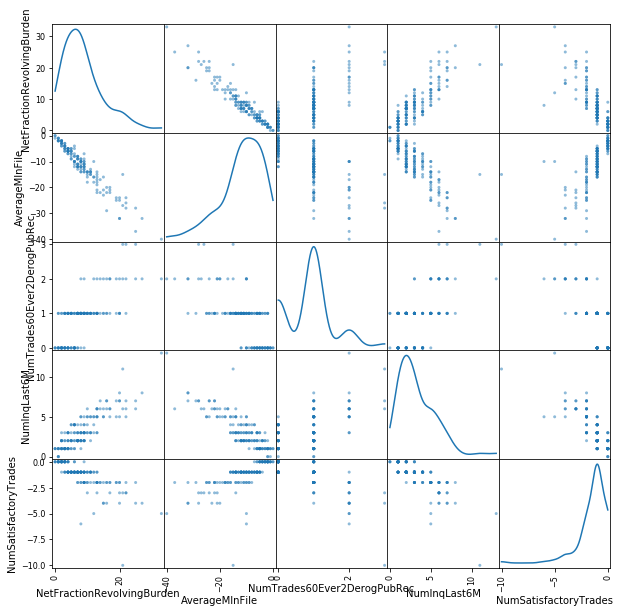

In [15]:
scatter_matrix(diff.loc[good_index, key_features], alpha=0.5, figsize=(10, 10), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13bbc9be0>,
      dtype=object)

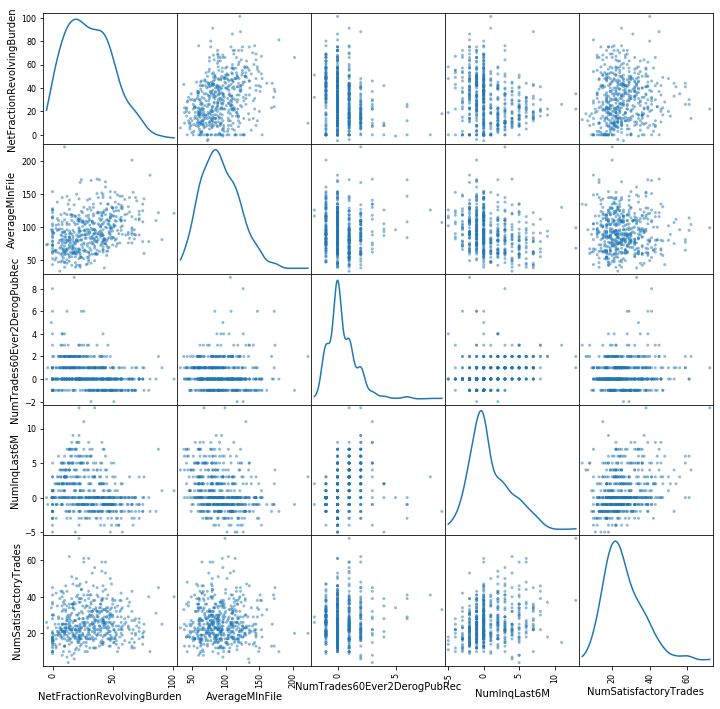

In [16]:
scatter_matrix(valid_cf[key_features], alpha=0.5, figsize=(12, 12), diagonal='kde')

In [18]:
valid_cf['Score'].std(), valid_origin['Score'].std()

(0.03197202, 0.2095725)